# Full Machine Learning Pipeline
Import everything that we need for this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
import pprint
pp = pprint.PrettyPrinter(indent = 4)

ModuleNotFoundError: No module named 'keras'

## 1. Heart Disease Dataset. 

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

### Attribute Information:

- age - age in years (Ratio Variable, Continuous)
- sex - sex(1 = male; 0 = female) (Nominal, Binary)
- chest_pain - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic) (Ordinal, Discrete)
- blood_pressure - resting blood pressure (in mm Hg on admission to the hospital) (Ratio Variable, Continuous)
- serum_cholestoral - serum cholestoral in mg/dl (Ratio Variable, Continuous)
- fasting_blood_sugar - fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Nominal or Ordinal?, Binary)
- electrocardiographic - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy) (Ordinal, Discrete)
- max_heart_rate - maximum heart rate achieved (Ratio Variable, Continuous)
- induced_angina - exercise induced angina (1 = yes; 0 = no) (Nominal, Binary)
- ST_depression - ST depression induced by exercise relative to rest (Ratio Variable, Continuous)
- slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping) (Nominal, Discrete)
- no_of_vessels - number of major vessels (0-3) colored by flourosopy (Nominal or Ordinal, Discrete)
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect (Nominal, Discrete)
- diagnosis - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing) (Discrete label)

In [3]:
# column names in accordance with feature information
col_names = ['age','sex','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar', 'electrocardiographic',
             'max_heart_rate','induced_angina','ST_depression','slope','no_of_vessels','thal','diagnosis']

# read the file
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", names=col_names, header=None, na_values="?")

print("Number of records: {}\nNumber of variables: {}".format(df.shape[0], df.shape[1]))

# display the first 5 lines
df.head(10)

Number of records: 303
Number of variables: 14


,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


## 2. Try converting the problem into a binary classification problem

### Target value

In [4]:
# count values of explained variable
df.diagnosis.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: diagnosis, dtype: int64

In [5]:
# create a boolean vector and map it with corresponding values (True=1, False=0)
df.diagnosis = (df.diagnosis != 0).astype(int)
df.diagnosis.value_counts()

0    164
1    139
Name: diagnosis, dtype: int64

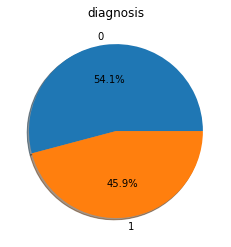

In [6]:
# create plot
f, ax = plt.subplots()
df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, shadow=True)
ax.set_title('diagnosis')
ax.set_ylabel('')
plt.show()

### Try printing the dataset again

Look at the binary label that remains.

In [7]:
df.head(10)

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


## 3. Normalize the dataset

In [8]:
from sklearn import preprocessing

X, Y = df.iloc[:, :-1], df.iloc[:, -1]

print(X)
print(Y)

# see if there are missing entries in the dataset features
X.isnull().sum()



      age  sex  chest_pain  blood_pressure  serum_cholestoral  \
0    63.0  1.0         1.0           145.0              233.0   
1    67.0  1.0         4.0           160.0              286.0   
2    67.0  1.0         4.0           120.0              229.0   
3    37.0  1.0         3.0           130.0              250.0   
4    41.0  0.0         2.0           130.0              204.0   
5    56.0  1.0         2.0           120.0              236.0   
6    62.0  0.0         4.0           140.0              268.0   
7    57.0  0.0         4.0           120.0              354.0   
8    63.0  1.0         4.0           130.0              254.0   
9    53.0  1.0         4.0           140.0              203.0   
10   57.0  1.0         4.0           140.0              192.0   
11   56.0  0.0         2.0           140.0              294.0   
12   56.0  1.0         3.0           130.0              256.0   
13   44.0  1.0         2.0           120.0              263.0   
14   52.0  1.0         3.

age                     0
sex                     0
chest_pain              0
blood_pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
no_of_vessels           4
thal                    2
dtype: int64

In [9]:
# fill missing values with mode 
X['no_of_vessels'].fillna(X['no_of_vessels'].mode()[0], inplace=True) 
X['thal'].fillna(X['thal'].mode()[0], inplace=True)

#do minmax normalization
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()#other kinds of normalization possible
x_scaled = min_max_scaler.fit_transform(x)
X_scaled = pd.DataFrame(x_scaled, columns=col_names[:-1])

final_dataset = pd.concat([X_scaled, Y], axis=1, sort=False)
print(final_dataset)

# see if there are missing entries in the dataset features
final_dataset.isnull().sum()

          age  sex  chest_pain  blood_pressure  serum_cholestoral  \
0    0.708333  1.0    0.000000        0.481132           0.244292   
1    0.791667  1.0    1.000000        0.622642           0.365297   
2    0.791667  1.0    1.000000        0.245283           0.235160   
3    0.166667  1.0    0.666667        0.339623           0.283105   
4    0.250000  0.0    0.333333        0.339623           0.178082   
5    0.562500  1.0    0.333333        0.245283           0.251142   
6    0.687500  0.0    1.000000        0.433962           0.324201   
7    0.583333  0.0    1.000000        0.245283           0.520548   
8    0.708333  1.0    1.000000        0.339623           0.292237   
9    0.500000  1.0    1.000000        0.433962           0.175799   
10   0.583333  1.0    1.000000        0.433962           0.150685   
11   0.562500  0.0    0.333333        0.433962           0.383562   
12   0.562500  1.0    0.666667        0.339623           0.296804   
13   0.312500  1.0    0.333333    

age                     0
sex                     0
chest_pain              0
blood_pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
no_of_vessels           0
thal                    0
diagnosis               0
dtype: int64

### Numeric features

In [10]:
# view of descriptive statistics
final_dataset[['serum_cholestoral', 'max_heart_rate', 'age', 'blood_pressure', 'ST_depression']].describe()

,serum_cholestoral,max_heart_rate,age,blood_pressure,ST_depression
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.275555,0.600055,0.529978,0.355564,0.167678
std,0.118212,0.174618,0.188305,0.166035,0.187270
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194064,0.477099,0.395833,0.245283,0.000000
50%,0.262557,0.625954,0.562500,0.339623,0.129032
75%,0.340183,0.725191,0.666667,0.433962,0.258065
max,1.000000,1.000000,1.000000,1.000000,1.000000


### Categorical features

In [11]:
# count ill vs healthy people grouped by sex
df.groupby(['sex','diagnosis'])['diagnosis'].count()

sex  diagnosis
0.0  0             72
     1             25
1.0  0             92
     1            114
Name: diagnosis, dtype: int64

## Train decision trees

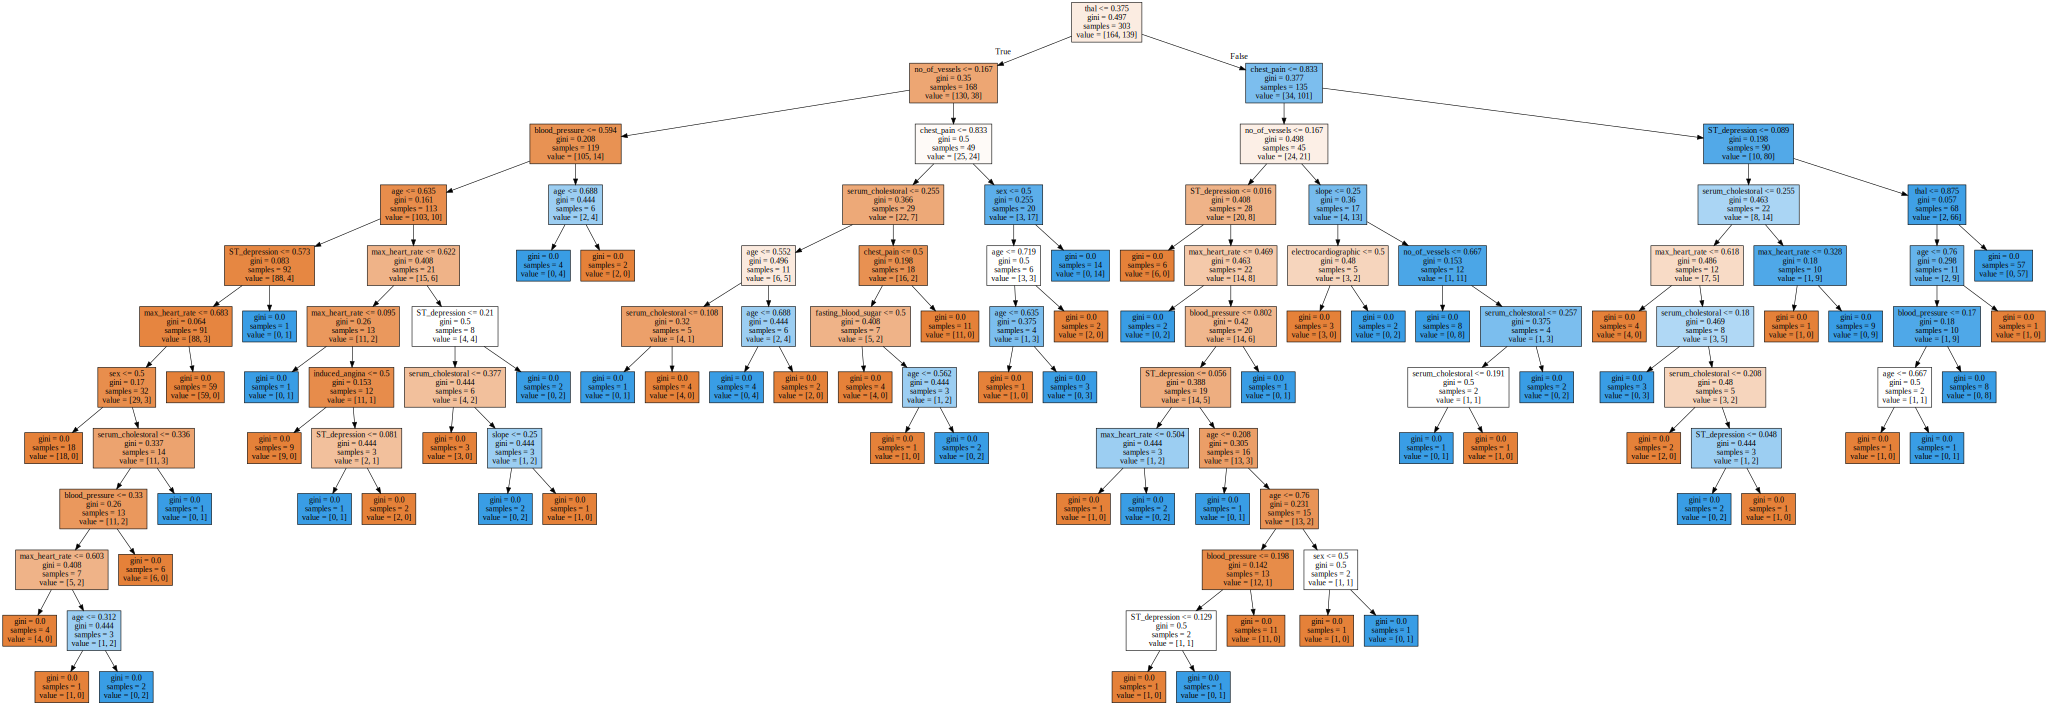

Accuracy on training set: 1.0


In [18]:
import graphviz

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

X = final_dataset.loc[:,final_dataset.columns!='diagnosis']
Y = final_dataset['diagnosis']

model = DecisionTreeClassifier()
model.fit(X, Y)

#tree.plot_tree(model) 
graph = Source(tree.export_graphviz(model , out_file=None , feature_names=col_names[:-1] , filled = True))

display(SVG(graph.pipe(format='svg')))

Y_predicted = model.predict(X)
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y, Y_predicted)
print('Accuracy on training set: '+str(accuracy))

### Decision Tree Classifier. Try to reduce the depth. Try different values to see the effect.

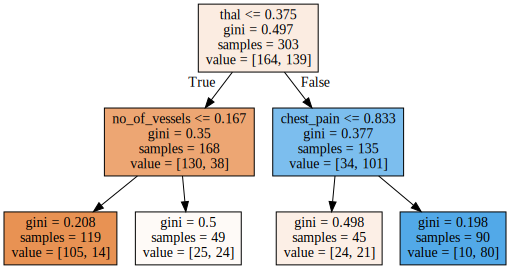

Accuracy on training set: 0.7722772277227723


In [22]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X, Y)

#tree.plot_tree(model) 
graph = Source(tree.export_graphviz(model , out_file=None , feature_names=col_names[:-1] , filled = True))

display(SVG(graph.pipe(format='svg')))

Y_predicted = model.predict(X)
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y, Y_predicted)
print('Accuracy on training set: '+str(accuracy))

### Set Min Samples in Leaf to 30. Try other values to see the effect.

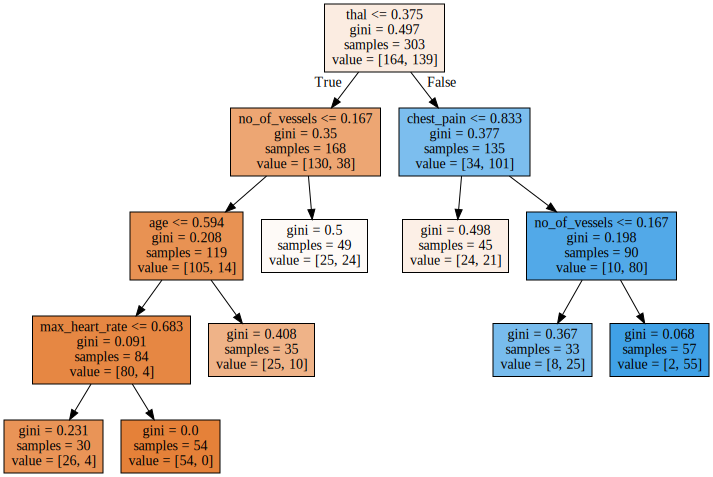

Accuracy on training set: 0.7722772277227723


In [23]:
model = DecisionTreeClassifier(min_samples_leaf=30)
model.fit(X, Y)

#tree.plot_tree(model) 
graph = Source(tree.export_graphviz(model , out_file=None , feature_names=col_names[:-1] , filled = True))

display(SVG(graph.pipe(format='svg')))

Y_predicted = model.predict(X)
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y, Y_predicted)
print('Accuracy on training set: '+str(accuracy))

## Onwards to Bagged Decision trees

In [33]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=30),n_estimators=50, max_samples=100, bootstrap=True, random_state=0)
model.fit(X,Y)

Y_predicted = model.predict(X)
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y, Y_predicted)
print('Accuracy on training set: '+str(accuracy))

Accuracy on training set: 0.8382838283828383


### Random Forests. Play with these parameters

In [34]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=50, max_depth=2, min_samples_leaf=2, random_state=0)

model.fit(X,Y)

Y_predicted = model.predict(X)
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y, Y_predicted)
print('Accuracy on training set: '+str(accuracy))

Accuracy on training set: 0.858085808580858


### AdaBoost Model. Onwards to boosted decision trees

In [35]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1e-3, random_state=0)

model.fit(X,Y)

Y_predicted = model.predict(X)
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y, Y_predicted)
print('Accuracy on training set: '+str(accuracy))

Accuracy on training set: 0.858085808580858
